In [1]:
# Necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Read the data
df_p = pd.read_excel('Base de unidades y propietarios.xlsx')
df_r = pd.read_excel('Respuestas.xlsx', header=[0,1])

In [3]:
# Information of dataframe
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 36 columns):
 #   Column                                                                                                                                                            Non-Null Count  Dtype         
---  ------                                                                                                                                                            --------------  -----         
 0   (respondent_id, respondent_id)                                                                                                                                    66 non-null     int64         
 1   (date_created, date_created)                                                                                                                                      66 non-null     datetime64[ns]
 2   (entrada, entrada)                                                                                  

In [4]:
# Change the column names
col_names = ['id','date','entrada','email','telefono','satisfaccion_pys','conocimiento','recomendacion','modelo_dpto',
            'aislacion_sonido','distribucion_general','tamaño_habitaciones','terminaciones','evaluacion_recintos',
            'conoce_areas_comunes','eval_plaza_interior','eval_lavanderia','eval_biciclitero','eval_gimnasio',
            'acceso_vehicular','acceso_peatones','cercania_servicios','estacionamiento_visitas','fachada_edificio',
            'ascensores','seguridad','uso_dpto','inf_sexo','estado_civil','nacimiento','mayor21','adolescente14_21',
            'menor14','num_autos','mascota','proyeccion']

df_r.columns = col_names

In [5]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       66 non-null     int64         
 1   date                     66 non-null     datetime64[ns]
 2   entrada                  66 non-null     object        
 3   email                    61 non-null     object        
 4   telefono                 64 non-null     object        
 5   satisfaccion_pys         66 non-null     int64         
 6   conocimiento             66 non-null     object        
 7   recomendacion            66 non-null     int64         
 8   modelo_dpto              66 non-null     object        
 9   aislacion_sonido         66 non-null     int64         
 10  distribucion_general     66 non-null     int64         
 11  tamaño_habitaciones      66 non-null     int64         
 12  terminaciones            66 non-null  

In [6]:
# Information of dataframe
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   N             150 non-null    int64         
 1   unidad        150 non-null    object        
 2   Nombre        129 non-null    object        
 3   email         124 non-null    object        
 4   telefono      125 non-null    object        
 5   fechaEntrega  129 non-null    datetime64[ns]
 6   estado        150 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 8.3+ KB


In [7]:
# Change the column names
df_p.columns = ['N','unidad','nombre','email','telefono','fecha_entrega','estado']
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   N              150 non-null    int64         
 1   unidad         150 non-null    object        
 2   nombre         129 non-null    object        
 3   email          124 non-null    object        
 4   telefono       125 non-null    object        
 5   fecha_entrega  129 non-null    datetime64[ns]
 6   estado         150 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 8.3+ KB


# Propietarios, breve análisis previo

Entregado          129
Sin información     21
Name: estado, dtype: int64
Entregado          0.86
Sin información    0.14
Name: estado, dtype: float64


<AxesSubplot:>

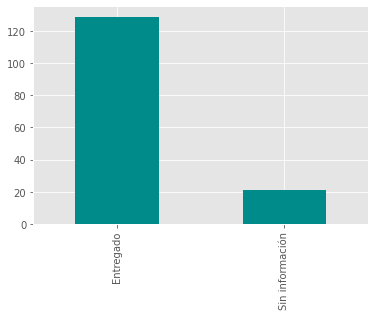

In [8]:
# Distribution of "estado" variable
plt.style.use('ggplot')

print(df_p.estado.value_counts())
print(df_p.estado.value_counts(normalize=True))
df_p.estado.value_counts().plot(kind='bar', color='darkcyan')

In [9]:
# Number of apartments sold by date
entregados = df_p[df_p['estado']=='Entregado'].set_index('fecha_entrega')
entregados_group = entregados.groupby(by=[entregados.index.year, entregados.index.month])['estado'].agg('count')
entregados = pd.DataFrame(entregados_group)
entregados['pct'] = entregados.estado / entregados_group.sum()
entregados

estado       pct
fecha_entrega fecha_entrega                  
2019          11                 21  0.162791
              12                 27  0.209302
2020          1                  42  0.325581
              2                  39  0.302326

Fecha de inicio de entregas : 2019/11/10
Fecha de última entrega : 2020/02/28


<AxesSubplot:xlabel='fecha_entrega,fecha_entrega'>

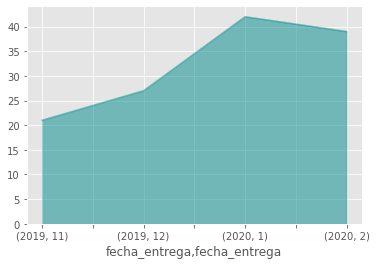

In [10]:
# Number of apartments sold by date
print('Fecha de inicio de entregas : {}'.format(df_p.fecha_entrega.min().strftime('%Y/%m/%d')))
print('Fecha de última entrega : {}'.format(df_p.fecha_entrega.max().strftime('%Y/%m/%d')))

entregados['estado'].plot(kind='area', color='darkcyan', alpha=0.5)

Juan perez 66     10
Juan perez 1       7
Juan perez 150     3
Juan perez 130     3
Name: nombre, dtype: int64


<AxesSubplot:>

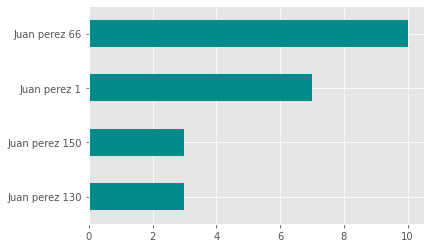

In [11]:
# Number of owners owning more than one apartment
probables_inversores = df_p[df_p['nombre'].isin(df_p['nombre'].value_counts()[df_p['nombre'].value_counts()>1].index)]

print(probables_inversores.nombre.value_counts())
probables_inversores.nombre.value_counts(ascending=True).plot(kind='barh', color='darkcyan')

# Propietarios

In [12]:
# The two databases can be linked with the telephone numbers and e-mail addresses of the owners
contacto = df_r[['id','date','email','telefono']]
contacto.isna().value_counts()

id     date   email  telefono
False  False  False  False       59
              True   False        5
              False  True         2
dtype: int64

In [13]:
# We know that there are duplicate name values that are owners who purchased more than one unit
respondieron = contacto.merge(df_p, on=['email', 'telefono'])
respondieron

,id,date,email,telefono,N,unidad,nombre,fecha_entrega,estado
0,1,2021-02-28,NaN,a55443444,74,C-374,Juan perez 74,2019-12-14,Entregado
1,2,2021-02-28,NaN,a55443445,75,C-375,Juan perez 75,2019-12-15,Entregado
2,3,2021-02-28,NaN,a55443446,76,C-376,Juan perez 76,2019-12-16,Entregado
3,4,2021-02-28,NaN,a55443392,22,A-22,Juan perez 22,2020-02-07,Entregado
4,5,2021-02-28,NaN,a55443393,23,A-23,Juan perez 23,2020-02-08,Entregado
...,...,...,...,...,...,...,...,...,...
86,62,2021-03-02,ejemplo90@gmail.com,a55443460,90,C-390,Juan perez 90,2019-12-30,Entregado
87,63,2021-03-02,ejemplo91@gmail.com,a55443461,91,C-391,Juan perez 91,2019-12-31,Entregado
88,64,2021-03-02,ejemplo92@gmail.com,a55443462,92,C-392,Juan perez 92,2020-01-01,Entregado
89,65,2021-03-02,ejemplo93@gmail.com,a55443463,93,C-393,Juan perez 93,2020-01-02,Entregado


In [14]:
# Recognizing which owner responded to more than one survey
ids = respondieron['id']
uni = respondieron['unidad']
respondieron[(ids.isin(ids[ids.duplicated()])) & (uni.isin(uni[uni.duplicated()]))]

,id,date,email,telefono,N,unidad,nombre,fecha_entrega,estado
28,27,2021-03-01,ejemplo1@gmail.com,a55443371,1,A-01,Juan perez 1,2020-01-17,Entregado
29,27,2021-03-01,ejemplo1@gmail.com,a55443371,24,A-24,Juan perez 1,2020-02-09,Entregado
30,27,2021-03-01,ejemplo1@gmail.com,a55443371,25,A-25,Juan perez 1,2020-02-10,Entregado
31,27,2021-03-01,ejemplo1@gmail.com,a55443371,56,B-256,Juan perez 1,2019-11-26,Entregado
32,27,2021-03-01,ejemplo1@gmail.com,a55443371,57,B-257,Juan perez 1,2019-11-27,Entregado
33,27,2021-03-01,ejemplo1@gmail.com,a55443371,71,C-371,Juan perez 1,2019-12-11,Entregado
34,27,2021-03-01,ejemplo1@gmail.com,a55443371,72,C-372,Juan perez 1,2019-12-12,Entregado
35,38,2021-03-01,ejemplo1@gmail.com,a55443371,1,A-01,Juan perez 1,2020-01-17,Entregado
36,38,2021-03-01,ejemplo1@gmail.com,a55443371,24,A-24,Juan perez 1,2020-02-09,Entregado
37,38,2021-03-01,ejemplo1@gmail.com,a55443371,25,A-25,Juan perez 1,2020-02-10,Entregado


In [15]:
# Eliminating duplicates to quantify which owners did and did not respond
respondieron = respondieron.drop_duplicates(subset=['unidad']).reset_index().drop('index', axis=1)
respondieron

,id,date,email,telefono,N,unidad,nombre,fecha_entrega,estado
0,1,2021-02-28,NaN,a55443444,74,C-374,Juan perez 74,2019-12-14,Entregado
1,2,2021-02-28,NaN,a55443445,75,C-375,Juan perez 75,2019-12-15,Entregado
2,3,2021-02-28,NaN,a55443446,76,C-376,Juan perez 76,2019-12-16,Entregado
3,4,2021-02-28,NaN,a55443392,22,A-22,Juan perez 22,2020-02-07,Entregado
4,5,2021-02-28,NaN,a55443393,23,A-23,Juan perez 23,2020-02-08,Entregado
...,...,...,...,...,...,...,...,...,...
79,62,2021-03-02,ejemplo90@gmail.com,a55443460,90,C-390,Juan perez 90,2019-12-30,Entregado
80,63,2021-03-02,ejemplo91@gmail.com,a55443461,91,C-391,Juan perez 91,2019-12-31,Entregado
81,64,2021-03-02,ejemplo92@gmail.com,a55443462,92,C-392,Juan perez 92,2020-01-01,Entregado
82,65,2021-03-02,ejemplo93@gmail.com,a55443463,93,C-393,Juan perez 93,2020-01-02,Entregado


In [16]:
# Merge df_p (owners) and surveys 
df_p_ampliado = df_p.merge(respondieron[['id','date','nombre']], on='nombre', how='outer').drop_duplicates(subset='N').sort_values(by='N')

# Fill nan values in ID column
df_p_ampliado['id'] = df_p_ampliado['id'].fillna('no value')

# New column para identificar si propietario responde o no encuesta
df_p_ampliado['responde'] = df_p_ampliado['id'].apply(lambda x: 'No' if x == 'no value' else 'Si')

# Delete "no value" in ID col
df_p_ampliado['id'] = df_p_ampliado['id'].replace('no value', np.nan)
df_p_ampliado = df_p_ampliado.reset_index().drop('index', axis=1)
df_p_ampliado

,N,unidad,nombre,email,telefono,fecha_entrega,estado,id,date,responde
0,1,A-01,Juan perez 1,ejemplo1@gmail.com,a55443371,2020-01-17,Entregado,27.0,2021-03-01,Si
1,2,A-02,Juan perez 2,ejemplo2@gmail.com,a55443372,2020-01-18,Entregado,28.0,2021-03-01,Si
2,3,A-03,Juan perez 3,ejemplo3@gmail.com,a55443373,2020-01-19,Entregado,29.0,2021-03-01,Si
3,4,A-04,Juan perez 4,ejemplo4@gmail.com,a55443374,2020-01-20,Entregado,30.0,2021-03-01,Si
4,5,A-05,Juan perez 5,ejemplo5@gmail.com,NaN,2020-01-21,Entregado,31.0,2021-03-01,Si
...,...,...,...,...,...,...,...,...,...,...
145,146,C-446,Juan perez 146,ejemplo146@gmail.com,a55443516,2020-02-24,Entregado,NaN,NaT,No
146,147,C-447,Juan perez 147,ejemplo147@gmail.com,a55443517,2020-02-25,Entregado,25.0,2021-03-01,Si
147,148,C-448,Juan perez 130,ejemplo130@gmail.com,a55443500,2020-02-26,Entregado,9.0,2021-02-28,Si
148,149,C-449,Juan perez 149,ejemplo149@gmail.com,a55443519,2020-02-27,Entregado,26.0,2021-03-01,Si


In [17]:
#df_p_ampliado.to_excel('propietarios.xlsx', index=False)

# Perfil de los propietarios

In [18]:
# Assuming that the value 0 existed in the survey, given these results, there are 21 surveys out of 66 that were not completed
df_r.isna().sum()

id                          0
date                        0
entrada                     0
email                       5
telefono                    2
satisfaccion_pys            0
conocimiento                0
recomendacion               0
modelo_dpto                 0
aislacion_sonido            0
distribucion_general        0
tamaño_habitaciones         0
terminaciones               0
evaluacion_recintos         0
conoce_areas_comunes        0
eval_plaza_interior         0
eval_lavanderia             0
eval_biciclitero            0
eval_gimnasio               0
acceso_vehicular            0
acceso_peatones             0
cercania_servicios          0
estacionamiento_visitas     0
fachada_edificio            0
ascensores                  0
seguridad                   0
uso_dpto                    0
inf_sexo                    0
estado_civil                0
nacimiento                  0
mayor21                    21
adolescente14_21           21
menor14                    21
num_autos 

In [19]:
# The profile data is separated to facilitate the work in BI
profile1 = df_r[['id','uso_dpto', 'inf_sexo', 'estado_civil', 'nacimiento']]
profile1

,id,uso_dpto,inf_sexo,estado_civil,nacimiento
0,1,Vivienda principal,Masculino,Casado(a),1989
1,2,Inversión/Arriendo,Femenino,Casado(a),1960
2,3,"Segunda vivienda (verano, temporal)",Femenino,Casado(a),1978
3,4,Inversión/Arriendo,Masculino,Casado(a),1968
4,5,"Segunda vivienda (verano, temporal)",Femenino,Casado(a),1974
...,...,...,...,...,...
61,62,Vivienda principal,Masculino,Casado(a),1987
62,63,Vivienda principal,Masculino,Casado(a),1992
63,64,Vivienda principal,Masculino,Casado(a),1985
64,65,Inversión/Arriendo,Masculino,Casado(a),1984


In [20]:
# There is no detail of the birth, we will assume that by 2021 all have completed one year
profile1['edad'] = int(datetime.today().strftime('%Y')) - profile1['nacimiento']
profile1

<ipython-input-20-7a0cddad8030>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile1['edad'] = int(datetime.today().strftime('%Y')) - profile1['nacimiento']


,id,uso_dpto,inf_sexo,estado_civil,nacimiento,edad
0,1,Vivienda principal,Masculino,Casado(a),1989,32
1,2,Inversión/Arriendo,Femenino,Casado(a),1960,61
2,3,"Segunda vivienda (verano, temporal)",Femenino,Casado(a),1978,43
3,4,Inversión/Arriendo,Masculino,Casado(a),1968,53
4,5,"Segunda vivienda (verano, temporal)",Femenino,Casado(a),1974,47
...,...,...,...,...,...,...
61,62,Vivienda principal,Masculino,Casado(a),1987,34
62,63,Vivienda principal,Masculino,Casado(a),1992,29
63,64,Vivienda principal,Masculino,Casado(a),1985,36
64,65,Inversión/Arriendo,Masculino,Casado(a),1984,37


In [21]:
# Information about the "edad"
print(profile1.edad.min(), profile1.edad.max(), profile1.edad.max()-profile1.edad.min())
print(np.arange(26, 68, 5))

27 65 38
[26 31 36 41 46 51 56 61 66]


In [22]:
# bins for "edad"
profile1['edad_bins'] = pd.cut(profile1.edad, np.arange(26, 68, 5))
profile1.tail(10)

<ipython-input-22-879eefa03f34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile1['edad_bins'] = pd.cut(profile1.edad, np.arange(26, 68, 5))


,id,uso_dpto,inf_sexo,estado_civil,nacimiento,edad,edad_bins
56,57,Vivienda principal,Femenino,Soltero(a),1990,31,"(26, 31]"
57,58,Inversión/Arriendo,Masculino,Soltero(a),1984,37,"(36, 41]"
58,59,Inversión/Arriendo,Femenino,Casado(a),1990,31,"(26, 31]"
59,60,Vivienda principal,Masculino,Casado(a),1956,65,"(61, 66]"
60,61,Vivienda principal,Masculino,Soltero(a),1993,28,"(26, 31]"
61,62,Vivienda principal,Masculino,Casado(a),1987,34,"(31, 36]"
62,63,Vivienda principal,Masculino,Casado(a),1992,29,"(26, 31]"
63,64,Vivienda principal,Masculino,Casado(a),1985,36,"(31, 36]"
64,65,Inversión/Arriendo,Masculino,Casado(a),1984,37,"(36, 41]"
65,66,Vivienda principal,Masculino,Divorciado(a),1970,51,"(46, 51]"


In [23]:
# Drop rows with full nan values
profile2 = df_r[['id','mayor21', 'adolescente14_21', 'menor14', 'num_autos', 'mascota', 'proyeccion']]
profile2 = profile2.dropna().reset_index().drop('index', axis=1)
profile2 

,id,mayor21,adolescente14_21,menor14,num_autos,mascota,proyeccion
0,1,2.0,0.0,0.0,2.0,No,1 a 2 años
1,6,2.0,0.0,0.0,2.0,No,5 a 6 años
2,7,1.0,0.0,0.0,1.0,No,7 a 10 años
3,11,2.0,0.0,0.0,2.0,Si,5 a 6 años
4,13,2.0,0.0,0.0,2.0,No,1 a 2 años
5,15,1.0,0.0,0.0,1.0,No,3 a 4 años
6,16,1.0,0.0,0.0,1.0,No,5 a 6 años
7,17,2.0,0.0,0.0,2.0,No,3 a 4 años
8,18,2.0,0.0,0.0,1.0,Si,3 a 4 años
9,19,1.0,0.0,0.0,1.0,Si,3 a 4 años


In [24]:
#profile1.to_excel('perfil1.xlsx', index=False)
#profile2.to_excel('perfil2.xlsx', index=False)

# Áreas comunes, nuevo DF

In [25]:
df_r.columns

Index(['id', 'date', 'entrada', 'email', 'telefono', 'satisfaccion_pys',
       'conocimiento', 'recomendacion', 'modelo_dpto', 'aislacion_sonido',
       'distribucion_general', 'tamaño_habitaciones', 'terminaciones',
       'evaluacion_recintos', 'conoce_areas_comunes', 'eval_plaza_interior',
       'eval_lavanderia', 'eval_biciclitero', 'eval_gimnasio',
       'acceso_vehicular', 'acceso_peatones', 'cercania_servicios',
       'estacionamiento_visitas', 'fachada_edificio', 'ascensores',
       'seguridad', 'uso_dpto', 'inf_sexo', 'estado_civil', 'nacimiento',
       'mayor21', 'adolescente14_21', 'menor14', 'num_autos', 'mascota',
       'proyeccion'],
      dtype='object')

In [26]:
areas_comunes = df_r[['id','conoce_areas_comunes', 'eval_plaza_interior',
       'eval_lavanderia', 'eval_biciclitero', 'eval_gimnasio']]
#areas_comunes.to_excel('areas_comunes.xlsx', index=False)

# Aspectos generales, nuevo DF

In [27]:
aspectos_generales = df_r[['id','aislacion_sonido',
       'distribucion_general', 'tamaño_habitaciones', 'terminaciones',
       'evaluacion_recintos']]
#aspectos_generales.to_excel('aspectos_generales.xlsx', index=False)

# Modelo departamento, nuevo DF

In [28]:
modelo = df_r[['id','modelo_dpto']]
#modelo.to_excel('modelo.xlsx', index=False)

# Sobre edificio, nuevo DF

In [29]:
sobre_edificio = df_r[['id','acceso_vehicular', 'acceso_peatones', 'cercania_servicios',
       'estacionamiento_visitas', 'fachada_edificio', 'ascensores',
       'seguridad']]
#sobre_edificio.to_excel('sobre_edificio.xlsx', index=False)

# Sobre inmobiliaria, nuevo DF

In [30]:
sobre_inmobiliaria = df_r[['id','satisfaccion_pys',
       'conocimiento', 'recomendacion']]
#sobre_inmobiliaria.to_excel('sobre_inmobiliaria.xlsx', index=False)